In [6]:
import os, sys
import numpy as np
from stl import mesh
import mpl_toolkits.mplot3d as a3
from matplotlib import pyplot
import matplotlib.colors as colors
import pylab as pl
import scipy as sp
import vtk
from vtk.util.numpy_support import vtk_to_numpy

In [2]:
# Load the STL files and add the vectors to the plot
MESH_DIR = '/net/birdstore/Active_Atlas_Data/data_root/CSHL_meshes/atlasV7/aligned_instance_meshes'
VOL_DIR = '/net/birdstore/Active_Atlas_Data/data_root/CSHL_volumes'
scpath = os.path.join(MESH_DIR, '10.0um_SC_5.stl')
icpath = os.path.join(MESH_DIR, '10.0um_IC_5.stl')
sc_mesh = mesh.Mesh.from_file(scpath)
ic_mesh = mesh.Mesh.from_file(icpath)

In [4]:
# this works but just mushes them together into one shape
cube = mesh.Mesh(np.concatenate([
    sc_mesh.data.copy(),
    ic_mesh.data.copy(),
]))

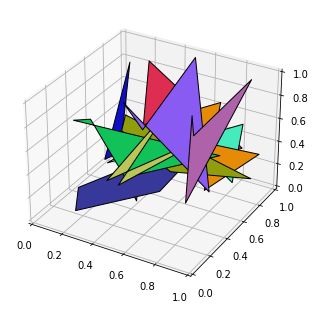

In [5]:
ax = a3.Axes3D(pl.figure())
for i in range(10):
    vtx = np.random.rand(4,3)
    tri = a3.art3d.Poly3DCollection([vtx])
    tri.set_color(colors.rgb2hex(np.random.rand(3)))
    tri.set_edgecolor('k')
    ax.add_collection3d(tri)
pl.show()

In [18]:
reader = vtk.vtkPolyDataReader()
vtkpath = '/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK39/preps/vtk/atlas'
vtkfile = os.path.join(vtkpath, '020.vtk')
reader.SetFileName(vtkfile)
reader.Update()
data = reader.GetOutput()

In [19]:
data.GetNumberOfCells()

0

In [13]:
reader = vtk.vtkPolyDataReader()
reader.SetFileName(sys.argv[1])
reader.Update()
polydata = reader.GetOutput()

'/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK39/preps/vtk/atlas/001.vtk'